# Import Statements

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mf
import seaborn as sns
import plotly.express as px

# Load data

In [105]:
path = r'NVDA.csv'
data = pd.read_csv(path)
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,28/11/2022,15.812541,15.827000,16.357000,15.725,16.025999,303741000
1,29/11/2022,15.624713,15.639000,15.932000,15.520,15.827000,298384000
2,30/11/2022,16.911863,16.923000,16.930000,15.597,15.697000,565298000
3,01/12/2022,17.123726,17.135000,17.264999,16.635,16.999001,470977000
4,02/12/2022,16.864895,16.875999,16.933001,16.445,16.659000,371389000


# Data Description: Stock data for Nvidia Corporation (NVDA) for 2 years from 2022 - 2024

In [106]:
print('Basic Info')
data.info()

Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Adj Close  503 non-null    float64
 2   Close      503 non-null    float64
 3   High       503 non-null    float64
 4   Low        503 non-null    float64
 5   Open       503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [107]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
        Adj Close       Close        High         Low        Open  \
count  503.000000  503.000000  503.000000  503.000000  503.000000   
mean    66.683592   66.695807   67.898183   65.367350   66.700469   
std     40.195051   40.192396   41.010291   39.375023   40.317208   
min     14.026766   14.036000   14.262000   13.884000   13.927000   
25%     38.228319   38.244999   39.324999   37.527500   38.505999   
50%     48.157665   48.167999   48.851002   47.608002   48.320000   
75%    103.751366  103.764504  106.512501  100.750000  103.799999   
max    148.880005  148.880005  152.889999  146.259995  149.350006   

             Volume  
count  5.030000e+02  
mean   4.356683e+08  
std    1.615063e+08  
min    1.575936e+08  
25%    3.345383e+08  
50%    4.125870e+08  
75%    5.037600e+08  
max    1.543911e+09  


# Check for missing values

In [108]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [109]:
data.fillna(data.mean(numeric_only=True), inplace=True)

# No missing values in Stock data

In [110]:
print("\nMissing Values (After Filling):")
print(data.isnull().sum())


Missing Values (After Filling):
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Visualizations
# Line Graph

# Interpretation: The line graph shows the stock prices over time. It compares the opening and closing prices of the NVIDIA stock. The 

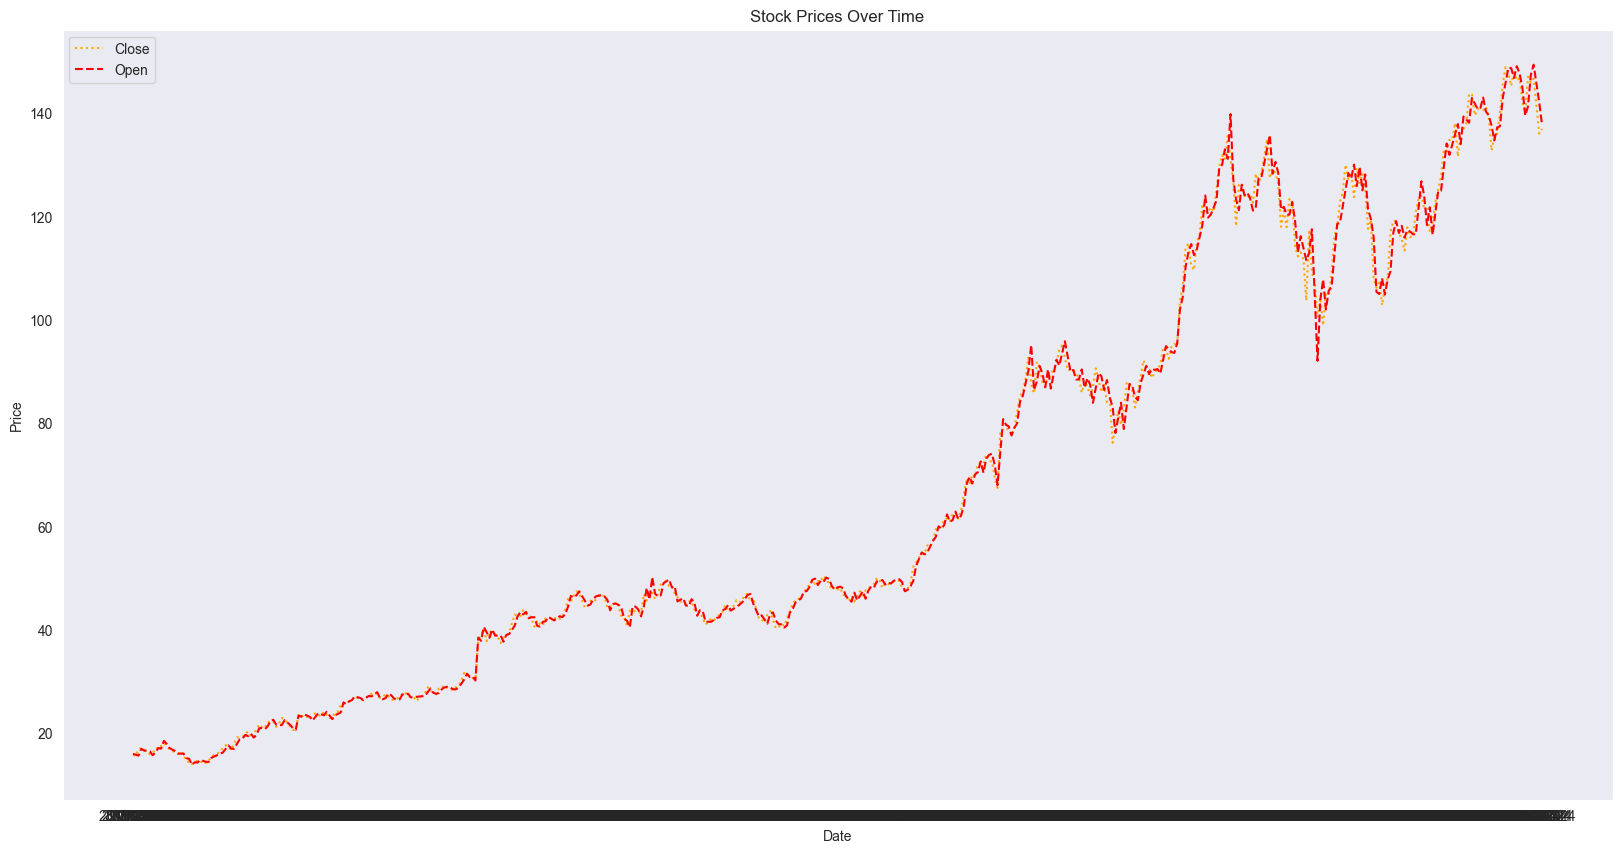

In [111]:
plt.figure(figsize=(20, 10))
plt.plot(data['Date'], data['Close'], label='Close', color='orange', linestyle=':')
plt.plot(data['Date'], data['Open'], label='Open', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.grid()
plt.show()

# Bar Graph

# Interpretation: The bar graph shows the trading volume over time. The volume is highest in the middle of the time period.

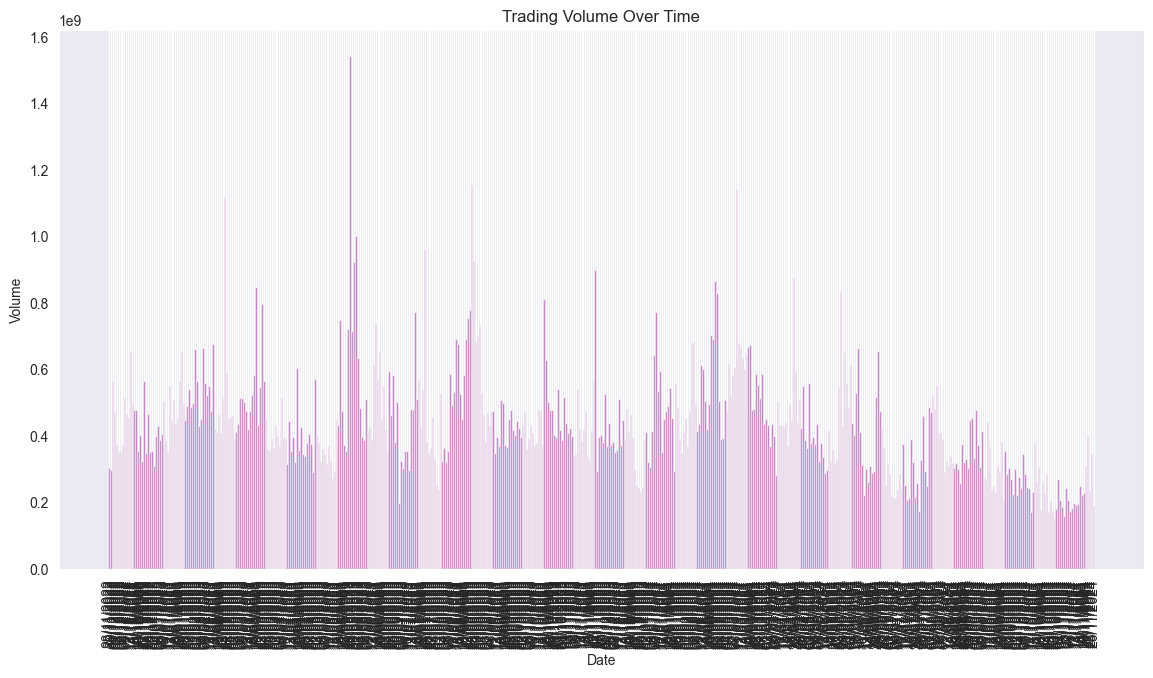

In [112]:
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['Volume'], color='purple', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Interactive Line Graph

# Interpretation: The interactive line graph shows the stock prices over time. The closing price is the most stable, while the high and low prices are more volatile. This line graph provides detail statistics of each date when hovered over the graph.

In [113]:
fig = px.line(data, x='Date', y=['Open', 'Close', 'High', 'Low'], title='Interactive Stock Prices')
fig.show()

# Box Plot

# Interpretation: The box plot shows the distribution of stock prices. We can observe there are no outliers in the data.

C:\Users\R\AppData\Local\Temp\ipykernel_19424\1809236192.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




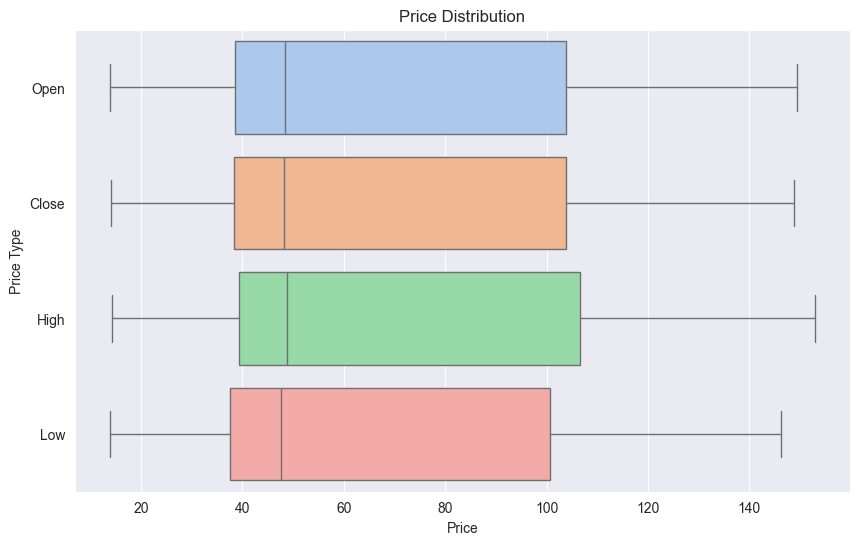

In [114]:
price_data = data[['Open', 'Close', 'High', 'Low']]
price_data_melted = price_data.melt(var_name='Price Type', value_name='Price')

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Price Type', x='Price', data=price_data_melted, palette='pastel')
plt.title('Price Distribution')
plt.show()

# Candlestick Chart

# Interpretation: The candlestick chart shows the stock prices over time. It provides the dynamics of trading prices. The green candlesticks represent days when the closing price is higher than the opening price, while the red candlesticks represent days when the closing price is lower than the opening price.

C:\Users\R\AppData\Local\Temp\ipykernel_19424\220125374.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



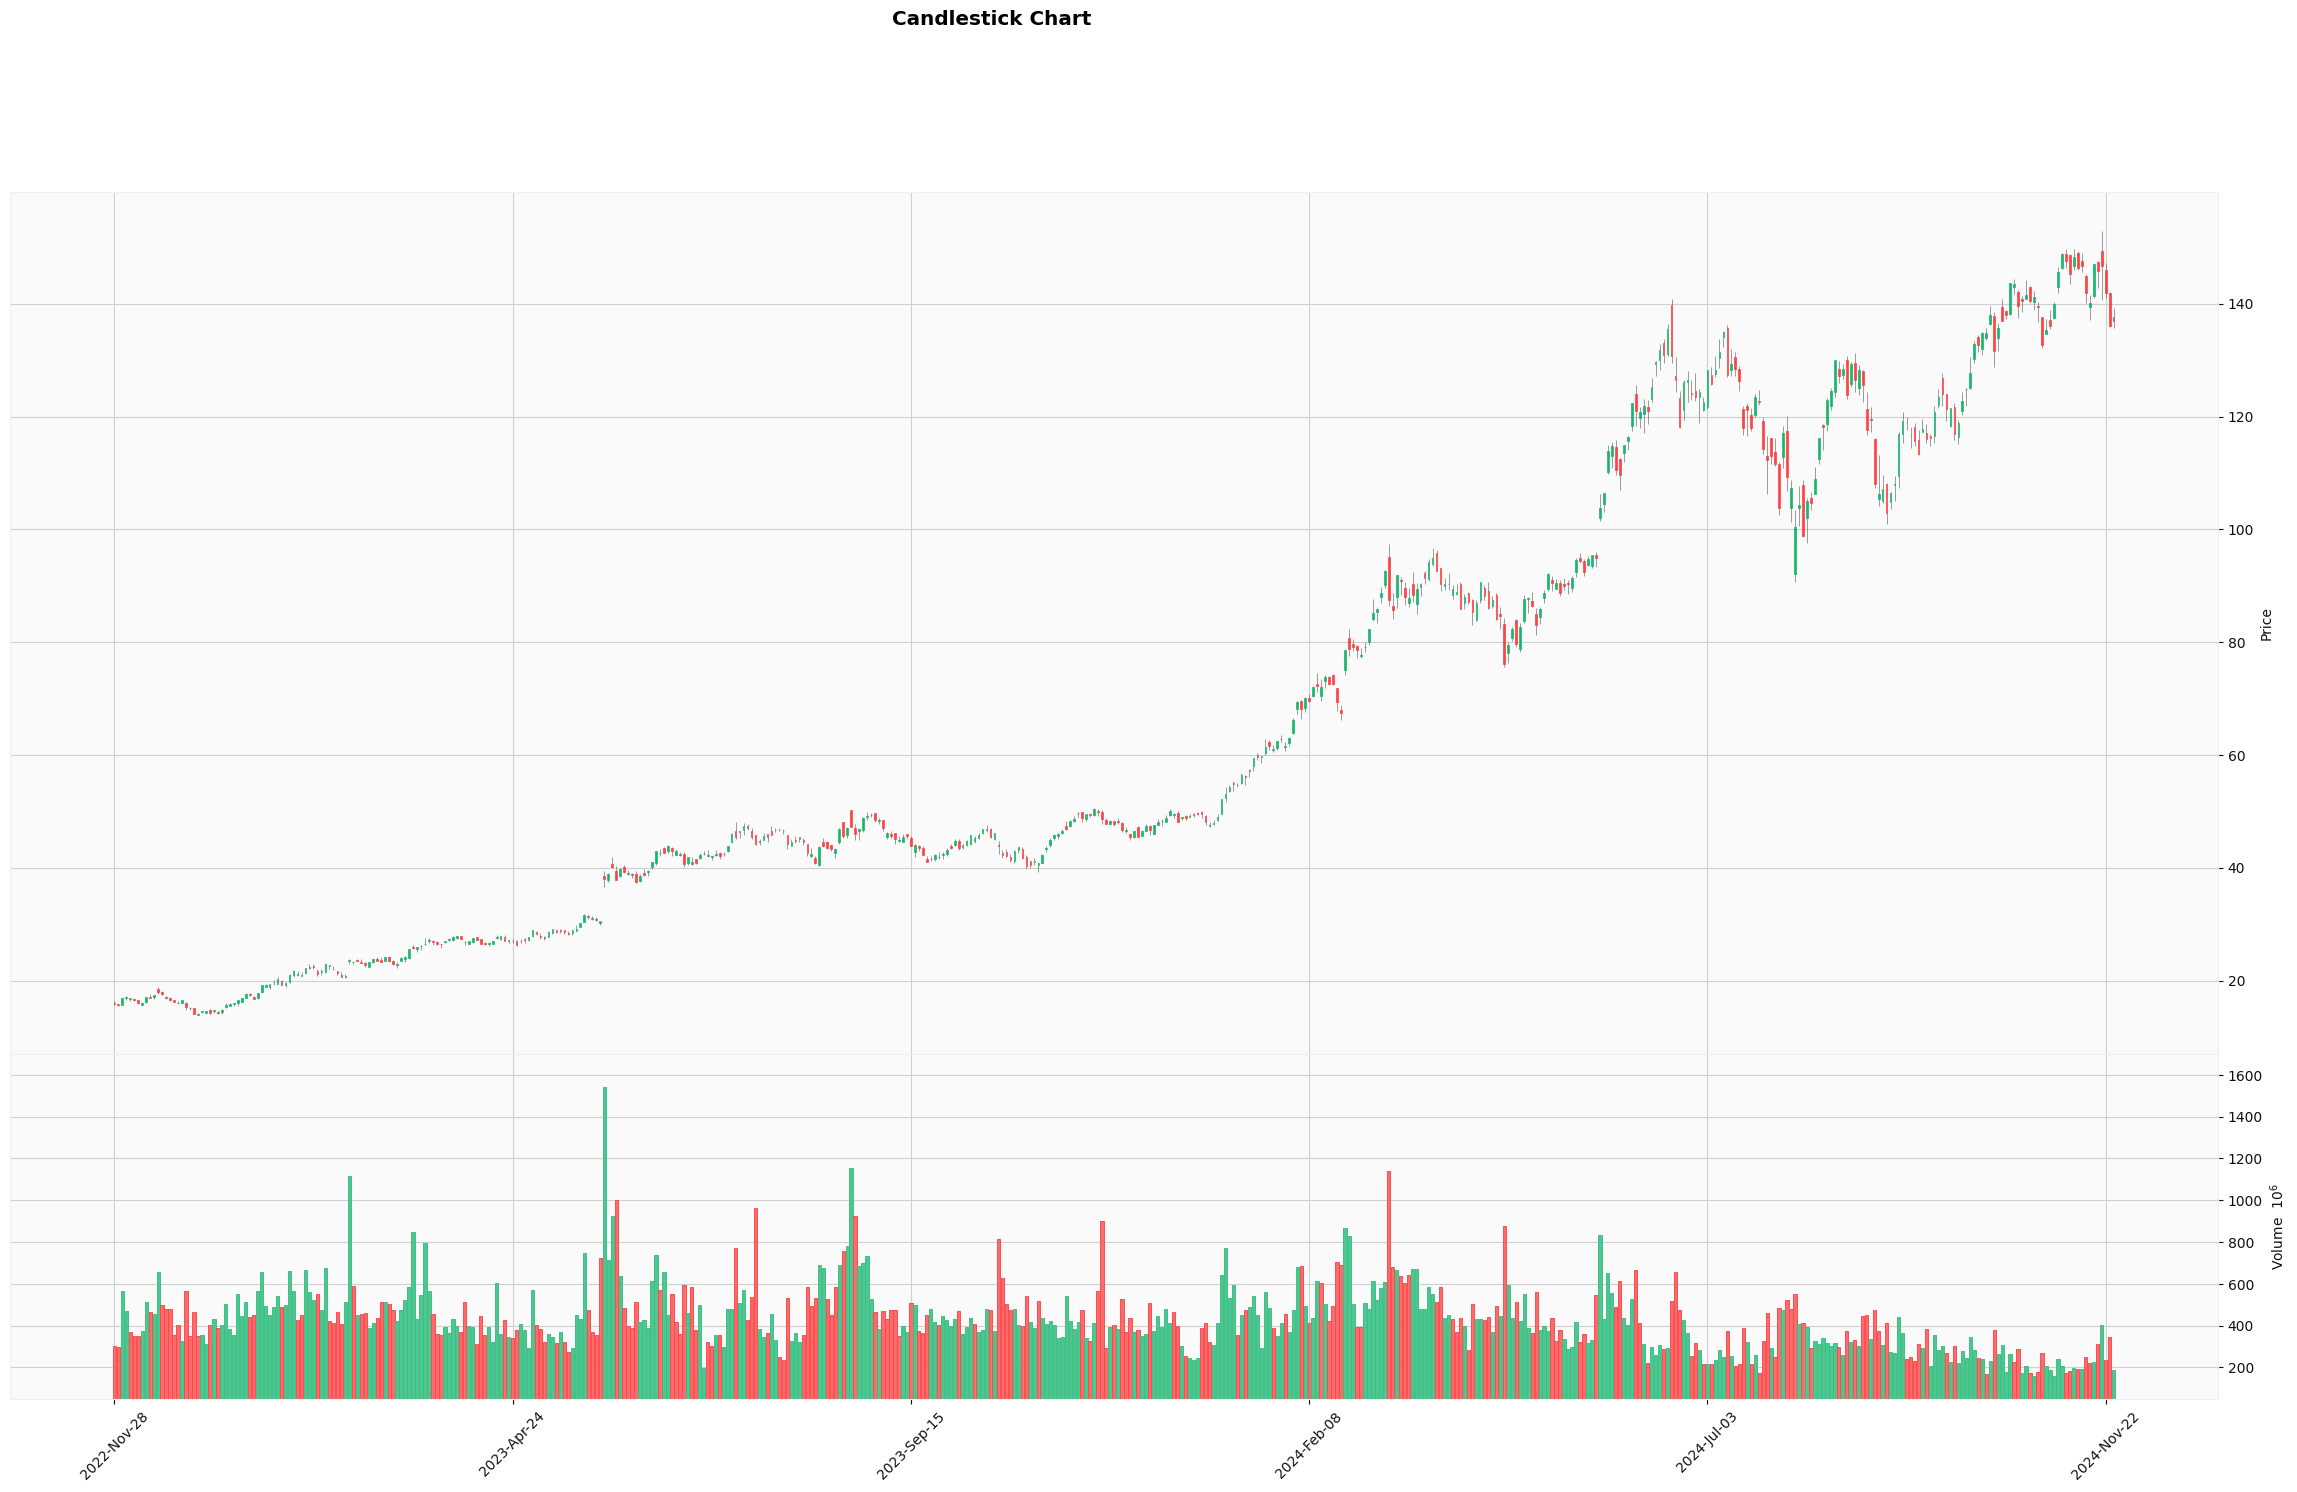

In [115]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

mf.plot(data, type='candle', title='Candlestick Chart', style='yahoo', volume=True, figratio=(16, 9),  # Aspect ratio (width, height)
         figscale=3)